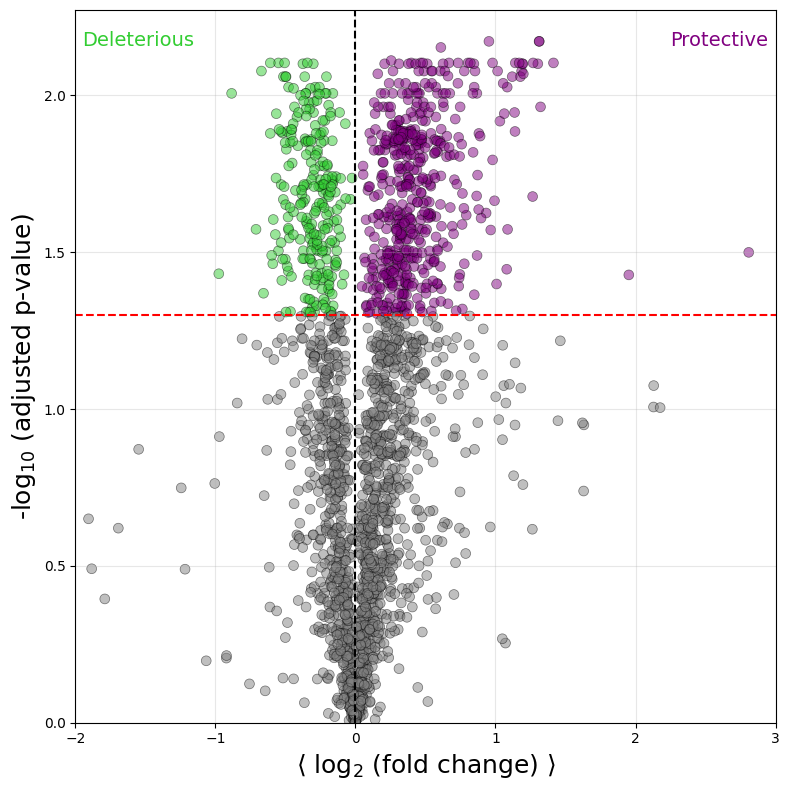

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


df1 = pd.read_csv('sequencing_data_all.csv')
df1['color'] = 'grey'
df1.loc[(df1['neg_log10_padj'] > -np.log10(0.05)) & (df1['calculated_avg'] > 0), 'color'] = 'purple'
df1.loc[(df1['neg_log10_padj'] > -np.log10(0.05)) & (df1['calculated_avg'] < 0), 'color'] = 'limegreen'

fig,ax=plt.subplots(figsize=[8,8])
# Create volcano plot
ax.scatter(df1['calculated_avg'], df1['neg_log10_padj'], alpha=0.5, s=50,
            c=df1['color'], edgecolors='k', linewidths=0.5)

# Add horizontal line at -log10(0.05)
ax.axhline(y=-np.log10(0.05), color='red', linestyle='--', linewidth=1.5, label='p = 0.05')

# Add vertical lines at +/- 0.5
ax.axvline(x=0, color='k', linestyle='--', linewidth=1.5, label='log2FC = ±0.5')

ax.set_xlabel(r'$\langle$ log$_2$ (fold change) $\rangle$', fontsize=18)
ax.set_ylabel('-log$_{10}$ (adjusted p-value)', fontsize=18)
ax.grid(True, alpha=0.3)
ax.text(0.99, 0.95, 'Protective', color='purple', fontsize=14, transform=ax.transAxes, ha='right')
ax.text(0.01, 0.95, 'Deleterious', color='limegreen', fontsize=14, transform=ax.transAxes, ha='left')
ax.set_xlim(-2, 3)
ax.set_ylim(0, df1['neg_log10_padj'].max() + 0.1)
plt.tight_layout()
plt.savefig('volcano_plot.svg', format='svg', bbox_inches='tight')
plt.show()

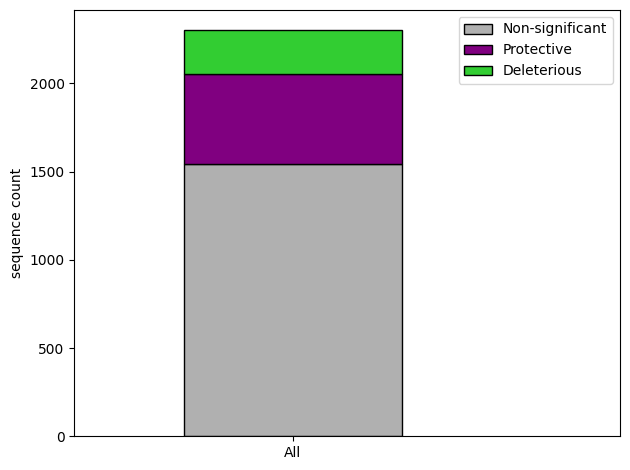

In [25]:
ns_counts = len(df1.loc[(df1['neg_log10_padj'] <= -np.log10(0.05))])
protect_counts = len(df1.loc[(df1['neg_log10_padj'] > -np.log10(0.05)) & (df1['calculated_avg'] > 0)])
delet_counts = len(df1.loc[(df1['neg_log10_padj'] > -np.log10(0.05)) & (df1['calculated_avg'] < 0)])
fig, ax = plt.subplots()

ax.bar(
    x=["All"],
    height=[ns_counts],
    label="Non‑significant",
    color="#b0b0b0",
    edgecolor='black',
    width=0.2
)
ax.bar(
    x=["All"],
    height=[protect_counts],
    bottom=[ns_counts],
    label="Protective",
    color="purple",
    edgecolor='black',
    width=0.2
)
ax.bar(
    x=["All"],
    height=[delet_counts],
    bottom=[ns_counts + protect_counts],
    label="Deleterious",
    color="limegreen",
    edgecolor='black',
    width=0.2
)

ax.set_xlim(-0.2, 0.3)
ax.set_ylabel("sequence count")
ax.legend()
plt.tight_layout()
plt.show()